In [1]:
%matplotlib inline 
import sys, os
base_path = os.getcwd()[0:os.getcwd().rfind('WatermarkRobustness')] + "WatermarkRobustness/"
sys.path.append(base_path) 

import matplotlib.pyplot as plt
from src.asiaccs_main import asiaccs_whitebox
from src.models import get_deep_cnn_for_cifar, get_lenet_model_for_mnist
from src.preprocess_data import load_cifar_images, load_mnist_images
from src.util import plot_whitebox

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Description
In this notebook we are running a surrogate model attack. The attacker and owner data is disjoint.

[1/6] ASIACCS (gaussian) Whitebox Attack: Loading MNIST data
      Owner data: 30000 Attacker Data: 30000
     Found cached training data for owner_data3000030000
     Found cached training data for attacker_data3000030000
[2/6] Generating ASIACCS watermarked images: Train(5000) Test(1000)
Embedding gaussian watermarks
(Gaussian) Plot class: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(Gaussian) Plot class: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


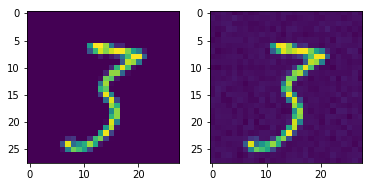

Embedding gaussian watermarks
(Gaussian) Plot class: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(Gaussian) Plot class: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


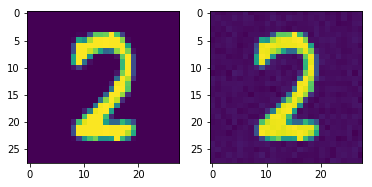

(Debug) Asiaccs whitebox:
Owner: 0.1317073132586369, Attacker: 0.12961363928904912, test: 0.13251460584233699, trigger: 0.13214202663820282, trigger_test: 0.13235953924224345
[3/6] Training the original model and embedding the watermark
Instructions for updating:
Use tf.cast instead.
      Skipping embedding of wm and use a cached entry instead
30000/30000 [==============================] - 9s 299us/step
    Done! Accuracy and loss: [0.04519114899021515, 0.9866666666666667]
[4/6] Labeling the attackers data with the original model
[5/6] Removing the watermark with the regularization attack.. 0
Train on 3000 samples, validate on 10000 samples
Epoch 1/30
3000/3000 [==============================] - 6s 2ms/step - loss: 3.6283 - acc: 0.9893 - val_loss: 1.7300 - val_acc: 0.9839
=> Time: : 5.699653387069702
=> watermark_new_val: 0.394
Confusion matrix, without normalization


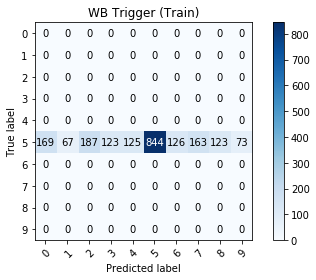

Confusion matrix, without normalization


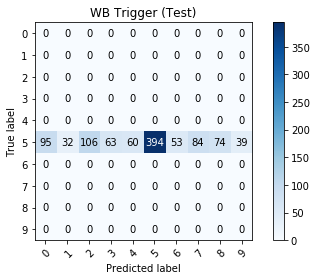

=> watermark_val: 0.422
Epoch 2/30
3000/3000 [==============================] - 5s 2ms/step - loss: 1.2224 - acc: 0.9783 - val_loss: 0.8641 - val_acc: 0.9756
=> Time: : 4.715321779251099
=> watermark_new_val: 0.096
Confusion matrix, without normalization


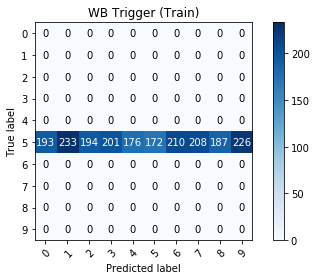

Confusion matrix, without normalization


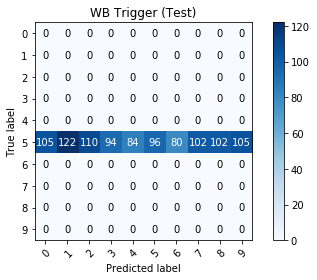

=> watermark_val: 0.086
(Early stopping) Current: [0.086] My value: 0.2
Early Stopping By WM: Patience decreased to 1
Epoch 3/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.7159 - acc: 0.9803 - val_loss: 0.5779 - val_acc: 0.9769
=> Time: : 4.533814430236816
=> watermark_new_val: 0.093
Confusion matrix, without normalization


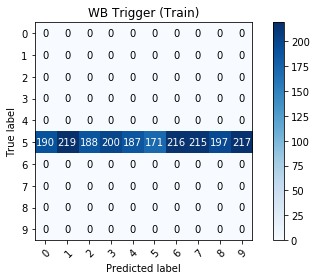

Confusion matrix, without normalization


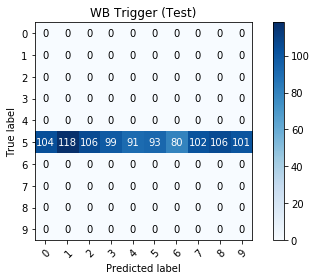

=> watermark_val: 0.0855
(Early stopping) Current: [0.0855] My value: 0.2
Early Stopping By WM: Patience decreased to 0
Epoch 4/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.5107 - acc: 0.9813 - val_loss: 0.4598 - val_acc: 0.9751
=> Time: : 4.5566840171813965
=> watermark_new_val: 0.095
Confusion matrix, without normalization


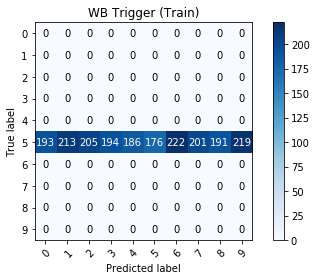

Confusion matrix, without normalization


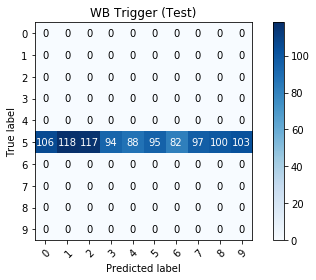

=> watermark_val: 0.088
(Early stopping) Current: [0.088] My value: 0.2
Epoch 00003: early stopping THR
[6/6] Training the surrogate model
Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 24s 796us/step - loss: 0.0731 - acc: 0.9810 - val_loss: 0.0477 - val_acc: 0.9851
=> Time: : 23.883704900741577
=> watermark_new_val: 0.093
Confusion matrix, without normalization


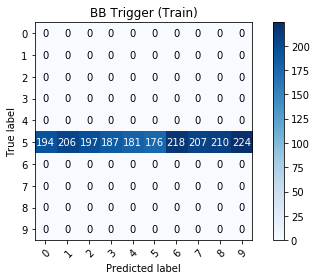

Confusion matrix, without normalization


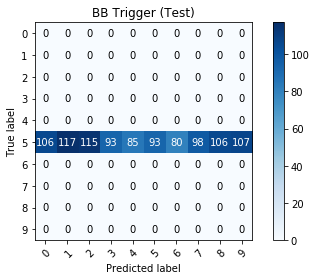

=> watermark_val: 0.088
Epoch 2/10
30000/30000 [==============================] - 24s 784us/step - loss: 0.0463 - acc: 0.9891 - val_loss: 0.0479 - val_acc: 0.9848
=> Time: : 23.52488923072815
=> watermark_new_val: 0.094
Confusion matrix, without normalization


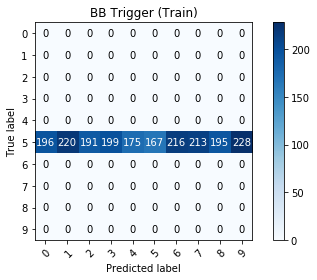

Confusion matrix, without normalization


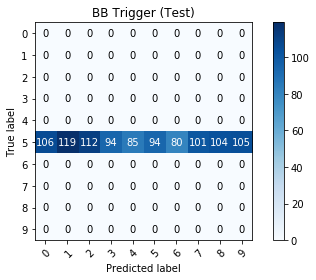

=> watermark_val: 0.0835
Epoch 3/10
30000/30000 [==============================] - 23s 770us/step - loss: 0.0412 - acc: 0.9912 - val_loss: 0.0600 - val_acc: 0.9813
=> Time: : 23.11672616004944
=> watermark_new_val: 0.093
Confusion matrix, without normalization


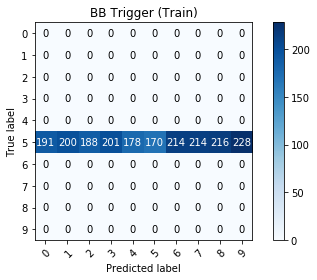

Confusion matrix, without normalization


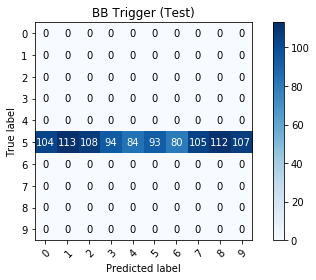

=> watermark_val: 0.085
Epoch 4/10
30000/30000 [==============================] - 23s 775us/step - loss: 0.0384 - acc: 0.9930 - val_loss: 0.0464 - val_acc: 0.9859
=> Time: : 23.262325048446655
=> watermark_new_val: 0.094
Confusion matrix, without normalization


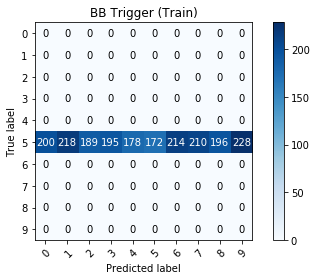

Confusion matrix, without normalization


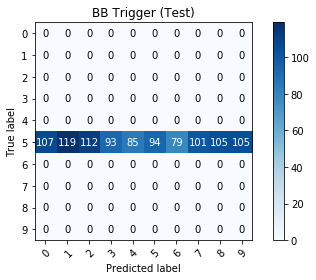

=> watermark_val: 0.086
Epoch 5/10
30000/30000 [==============================] - 23s 779us/step - loss: 0.0368 - acc: 0.9932 - val_loss: 0.0369 - val_acc: 0.9880
=> Time: : 23.38131856918335
=> watermark_new_val: 0.094
Confusion matrix, without normalization


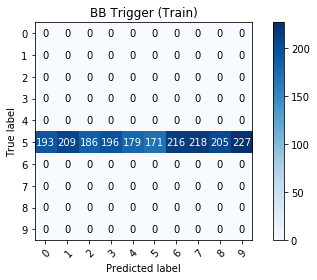

Confusion matrix, without normalization


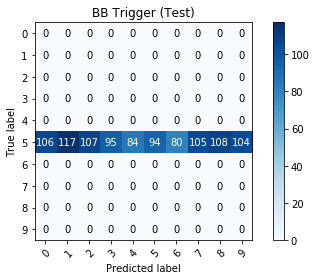

=> watermark_val: 0.0855


In [2]:
surr_model, all_history = asiaccs_whitebox(
     load_dataset_func=load_mnist_images,  # Which dataset to choose. Should return training and testing data
     dataset_label="MNIST",  # Label of the dataset (for caching)
     load_wm_model_func=get_lenet_model_for_mnist,  # Model specification for wm_embedding
     wm_type="gaussian", # logo or gaussian
     owner_data_size=30000,
     total_owner_data_size=30000,
     key_length=5000,
     key_length_test=1000,
     attacker_data_size=30000,
     total_attacker_data_size=30000,
     attacker_data_size_reg=3000,
     epochs_embed=10,
     epochs_reg=30,
     epochs_surr=10,
     freeze_first_layers=0,
     early_stopping_wm_reg=0.2, 
     patience_reg=2,
     reg_whitebox=0.003,
     lr_surr=0.001,  
     reg_surr=0,
     batchsize_reg=64,
     batchsize_surr=64,
     cache_embed_wm="asiaccs_gaussian_mnist_30000",
     cache_reg_model=None,
     cache_surr_model=None,
     verbose=True
)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])


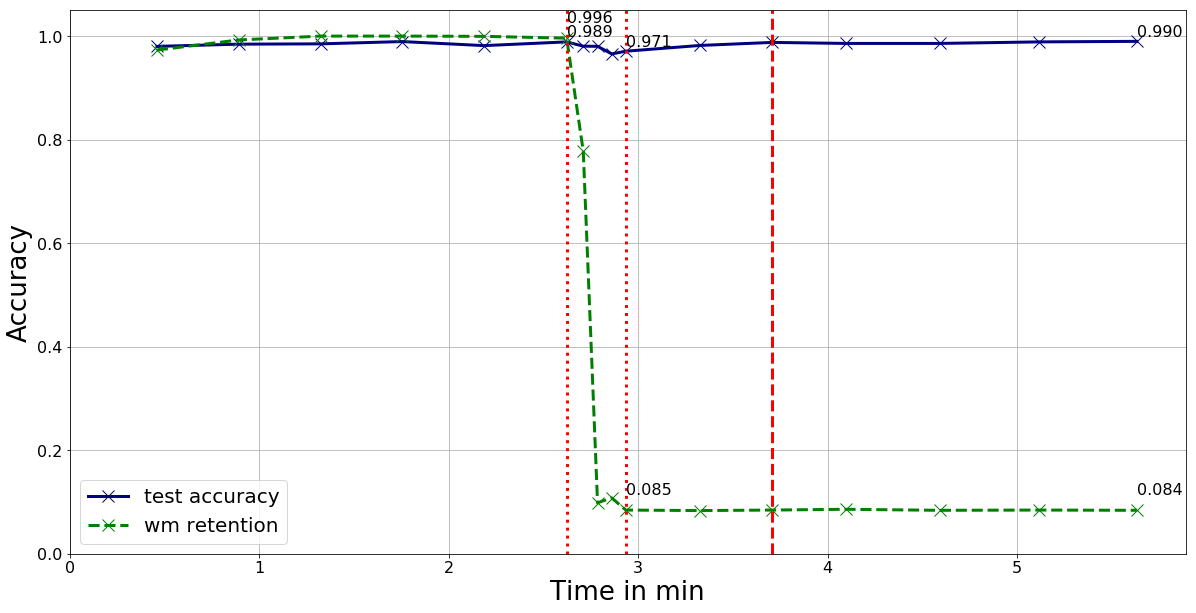

In [8]:
plot_whitebox(all_history, blackbox_surr_val_acc=0.987)

In [7]:
for history in all_history:
    print(sum(history.history["time"])/60)
blackbox_surr_val_acc=0.987
ctr =0
for time, acc in zip(all_history[2].history["time"], all_history[2].history["val_acc"]):
    if acc > blackbox_surr_val_acc:
        print("Time: {}, Acc: {}".format(sum(all_history[2].history["time"][:ctr+1])/60, acc))
        break
    ctr += 1

2.622510818640391
0.3121097882588704
2.696186101436615
Time: 0.7731142958005269, Acc: 0.9878
